# Skoltech, Experimental Data Processing

## Evgenii Safronov, Mikhail Kurenkov, Taras Melnik


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import numpy.random
from numpy.linalg import inv
import random

N = 200
M = 500
sigm_a = 0.2
sigm_mu = 20
v_0 = 1
x_0 = 5
T = 1

X_0 = np.array([[2],[0]])
P_0 = np.array([[10000, 0],[0, 10000]])
X = np.ones((N,2,1)) 
F = np.array([[1,T],[0,1]])
G = np.array([[(T**2)/2], [T]])
H = np.array([[1,0]])
P = np.ones((N, *(P_0.shape)))
Q = G.dot(G.transpose()).dot(sigm_a**2)





In [2]:
def kalman(X_0, P_0, N, X, G, H, Q, P, F, z):
    R = sigm_mu**2
    I = np.eye(2)
    K = np.ones((N, *(X_0.shape)))
    X[0] = X_0
    P[0] = P_0
    XF = np.zeros_like(X)
    F6 = np.linalg.matrix_power(F,6)
    # Prediction
    for i in range(1,N):
        X[i] = F.dot(X[i-1])
        P[i] = F.dot(P[i-1]).dot(F.transpose()) + Q
    # Filtration
        if z[i] == z[i]:
            K[i] = P[i].dot(H.transpose()).dot(inv(H.dot(P[i]).dot(H.transpose()) + R))
            P[i] = (I - K[i].dot(H)).dot(P[i]) 
            X[i] = X[i] + K[i].dot(z[i] - H.dot(X[i]))                      
        if i + 6 < len(z):
            XF[6 + i] = F6.dot(X[i])
    return X, XF
   
def create_trajectory(x_0, v_0, p):
    a = np.random.normal(0, sigm_a, N)
    v = np.ones(N) * v_0 + a.dot(np.triu(np.ones((N, N)),1)) * T
    x = np.ones(N) * x_0 + (v * T + (a * T**2)*0.5).dot(np.triu(np.ones((N,N)), 1))
    z = x + np.random.normal(0, sigm_mu, N)
    for i in range(N):
        k = random.randint(0,100)
        z[i] = (None if k <=p else z[i])
    return x, z


# Kalman filtration in a kind of measurements gaps 
## 1. Create measurements with gaps
## 2. Kalman filter in condition of gaps

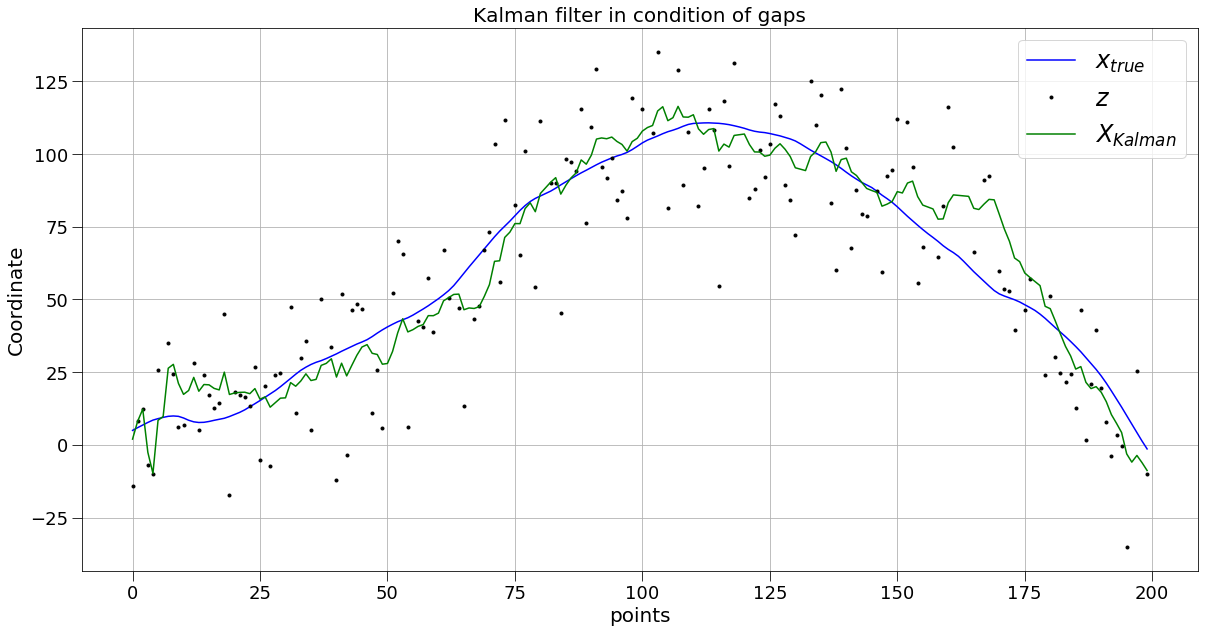

In [3]:
x, z = create_trajectory(x_0, v_0, 20)

X, XF= kalman(X_0, P_0, N, X, G, H, Q, P, F, z)

plt.figure(figsize = (20,10))
plt.title('Kalman filter in condition of gaps', size = (20))
plt.xlabel('points', size = (20))
plt.ylabel('Coordinate', size = (20))
plt.plot(x, label = '$x_{true}$', color = 'b')
plt.plot(z, '.', label = '$z$', color = 'black')
plt.plot(X[:,0], label = '$X_{Kalman}$', color = 'g')
plt.legend(fontsize = (24))
plt.grid()
plt.tick_params(axis='both', length = 10, labelsize = 18)

plt.show()



# Comparation of Errors

## Comparation of True, Extrapolated and Filtered errors with probability of measurement gaps P= 0.2; 0.3; 0.5

In [4]:
Final_Error_True = np.ones(N) 
Final_Error_Forecast = np.ones(N)
Final_Error_Gap_20 = np.ones(N)
Final_Error_Gap_30 = np.ones(N)
Final_Error_Gap_50 = np.ones(N)
Error_True = np.ones((M,N))
Error_Forecast = np.ones((M,N))
Error_Gap_20 = np.ones((M,N))
Error_Gap_30 = np.ones((M,N))
Error_Gap_50 = np.ones((M,N))

for i in range(M):
    x, z = create_trajectory(x_0, v_0, -1)
    X, XF = kalman(X_0, P_0, N, X, G, H, Q, P, F, z)
    Error_True[i] = (x - X[:,0,0])**2
    xf, zf = create_trajectory(x_0, v_0, -1)
    Xf, XFf = kalman(X_0, P_0, N, X, G, H, Q, P, F, zf)
    Error_Forecast[i] = (xf - XFf[:,0,0])**2
    x_20, z_20 = create_trajectory(x_0, v_0, 20)
    X_20, XF_20 = kalman(X_0, P_0, N, X, G, H, Q, P, F, z_20)
    Error_Gap_20[i] = (x_20 - X_20[:,0,0])**2
    x_30, z_30 = create_trajectory(x_0, v_0, 30)
    X_30, XF_30 = kalman(X_0, P_0, N, X, G, H, Q, P, F, z_30)
    Error_Gap_30[i] = (x_30 - X_30[:,0,0])**2
    x_50, z_50 = create_trajectory(x_0, v_0, 50)
    X_50, XF_50 = kalman(X_0, P_0, N, X, G, H, Q, P, F, z_50)
    Error_Gap_50[i] = (x_50 - X_50[:,0,0])**2
    
for i in range(N):
    Final_Error_True[i] = (np.sum(Error_True[:,i])/(M-1))**0.5
    Final_Error_Forecast[i] = (np.sum(Error_Forecast[:,i])/(M-1))**0.5
    Final_Error_Gap_20[i] = (np.sum(Error_Gap_20[:,i])/(M-1))**0.5
    Final_Error_Gap_30[i] = (np.sum(Error_Gap_30[:,i])/(M-1))**0.5
    Final_Error_Gap_50[i] = (np.sum(Error_Gap_50[:,i])/(M-1))**0.5



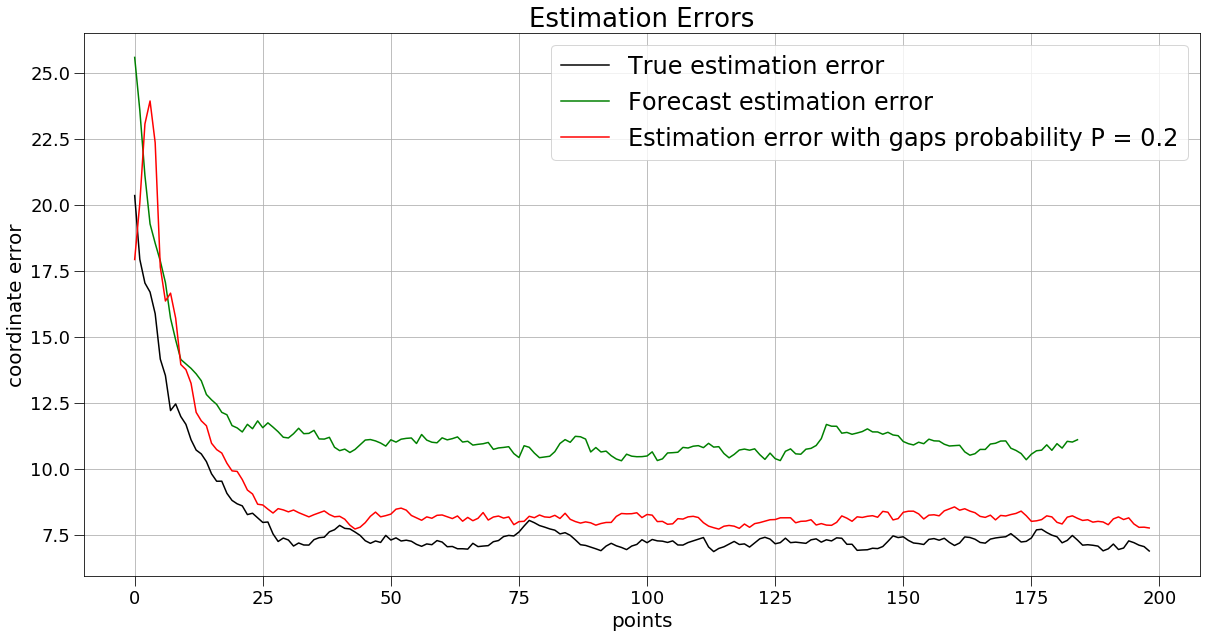

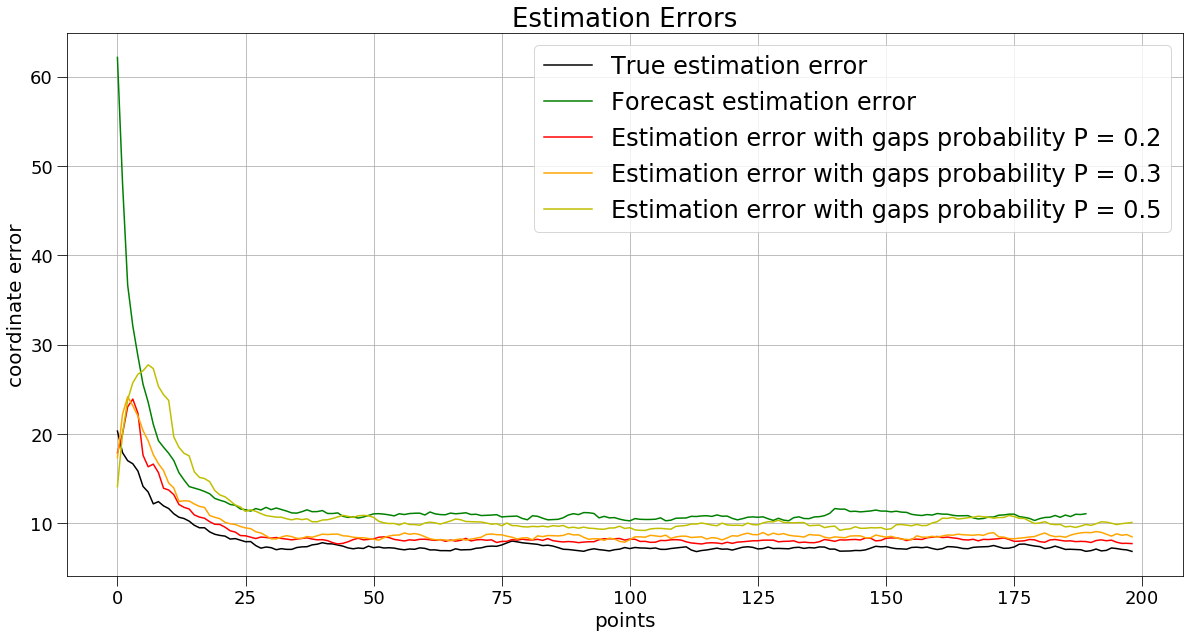

In [5]:
plt.figure(figsize = (20,10))
plt.title('Estimation Errors', size = (26))
plt.xlabel('points', size = (20))
plt.ylabel('coordinate error', size = (20))
plt.plot(Final_Error_True[1:], label = 'True estimation error', color = 'black')
plt.plot(Final_Error_Forecast[15:], label = 'Forecast estimation error', color = 'g')
plt.plot(Final_Error_Gap_20[1:], label = 'Estimation error with gaps probability P = 0.2', color = 'r' )
plt.legend(fontsize = (24))
plt.tick_params(axis='both', length = 10, labelsize = 18)
plt.grid()

plt.figure(figsize = (20,10))
plt.title('Estimation Errors', size = (26))
plt.xlabel('points', size = (20))
plt.ylabel('coordinate error', size = (20))
plt.plot(Final_Error_True[1:], label = 'True estimation error', color = 'black')
plt.plot(Final_Error_Forecast[10:], label = 'Forecast estimation error', color = 'g')
plt.plot(Final_Error_Gap_20[1:], label = 'Estimation error with gaps probability P = 0.2', color = 'r' )
plt.plot(Final_Error_Gap_30[1:], label = 'Estimation error with gaps probability P = 0.3', color = 'orange')
plt.plot(Final_Error_Gap_50[1:], label = 'Estimation error with gaps probability P = 0.5', color = 'y')
plt.legend(fontsize = (24))
plt.tick_params(axis='both', length = 10, labelsize = 18)
plt.grid()



plt.show()

## Obviously that estimation error increases with increase of gap probability and is between true and forecast error. It occurs because of we change gap mesured values with forecast ones. As a result error streams to true error with P ->0 and to forecast error with P -> 1. 